In [48]:
import os
import pickle
import gym
import numpy as np
import matplotlib.pyplot as plt


In [55]:
map_name=1678368152 # int
method='ql' # str [ql,sa,mc]
run=0      # int
map_path=f"data/{map_name}/"
path = f"data/{map_name}/{method}%04d/" %run

In [56]:
with open(str(map_path)+'/map_desc.pickle', 'rb') as f:
    map_desc = pickle.load(f)


In [57]:
env = gym.make('FrozenLake-v1',
            is_slippery=False,
            desc=map_desc,
            render_mode="human" )


In [58]:
qtable=np.load(
    path+'qtable_final.npy'
)

In [59]:
print(qtable)

[[ 0.          0.2097152   0.32768     0.        ]
 [ 0.262144   -1.          0.4096      0.        ]
 [ 0.32768     0.512      -1.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.16777216  0.          0.262144  ]
 [ 0.          0.          0.          0.        ]
 [-1.          0.64        0.64        0.4096    ]
 [ 0.512       0.8         0.64       -1.        ]
 [ 0.          0.13421773  0.          0.2097152 ]
 [ 0.16777216  0.64        0.64       -1.        ]
 [ 0.512       0.8         0.8         0.512     ]
 [ 0.64        1.          0.8         0.64      ]
 [ 0.          0.          0.          0.16777216]
 [ 0.13421773  0.          0.8         0.512     ]
 [ 0.64        0.          1.          0.64      ]
 [ 0.          0.          0.          0.        ]]


In [60]:
statestate = env.reset()
state = statestate[0]
total_rewards = 0

env.render()
done = False


action_list = possible_actions(state) 
row = list(qtable[state])
goodq = []
for i in action_list:
    goodq.append(row[i])

max_value = np.max(goodq)
max_indices = np.where(row == max_value)[0]
action = max_indices[0]

# action=np.argmax(qtable[state])

input()
while not done:

    new_state, reward, done, truncated, info = env.step(action)

    state = new_state
    action_list = possible_actions(state) 
    row = list(qtable[state])
    goodq = []
    for i in action_list:
        goodq.append(row[i])

    max_value = np.max(goodq)
    max_indices = np.where(row == max_value)[0]
    action = max_indices[0]    
    input()

env.close()


c:\Users\a\.conda\envs\fl_39\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [42]:
test=9

In [43]:
"%04d" % test

'0009'

In [44]:
def plot_Q_table(Q, n):
    assert Q.shape == (n**2, 4), "Invalid Q table shape"
    
    fig, ax = plt.subplots(figsize=(n, n))
    
    # Create a grid of n by n boxes, each bisected diagonally into two triangles
    for i in range(n):
        for j in range(n):
            x = [i, i+1, i+1, i]
            y = [j, j, j+1, j+1]
            ax.fill_between(x, y, where=[0, 1, 0, 1], facecolor='white', edgecolor='black')
            ax.fill_between(x, y, where=[0, 0, 1, 0], facecolor='white', edgecolor='black')
            
            # Get the Q values for the state-action pair in this box
            state_idx = i*n + j
            q_vals = Q[state_idx]
            
            # Calculate the color for each triangle based on the Q value
            c1 = plt.cm.Reds(q_vals[0]/np.max(Q))
            c2 = plt.cm.Blues(q_vals[2]/np.max(Q))
            c3 = plt.cm.Greens(q_vals[1]/np.max(Q))
            c4 = plt.cm.Purples(q_vals[3]/np.max(Q))
            
            # Fill each triangle with its corresponding color
            ax.fill_between(x[:2], y[:2], where=[0, 1], facecolor=c1, edgecolor='black')
            ax.fill_between(x[1:3], y[1:3], where=[1, 0], facecolor=c2, edgecolor='black')
            ax.fill_between(x[2:], y[2:], where=[0, 1], facecolor=c3, edgecolor='black')
            ax.fill_between(x[::3], y[::3], where=[1, 0], facecolor=c4, edgecolor='black')
    
    ax.set_xlim([0, n])
    ax.set_ylim([0, n])
    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()


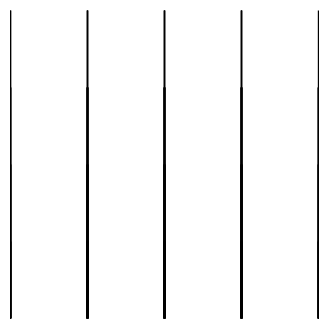

In [45]:
plot_Q_table(qtable,4)